# Sheet 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## <center>  Problem 4(a)</center>

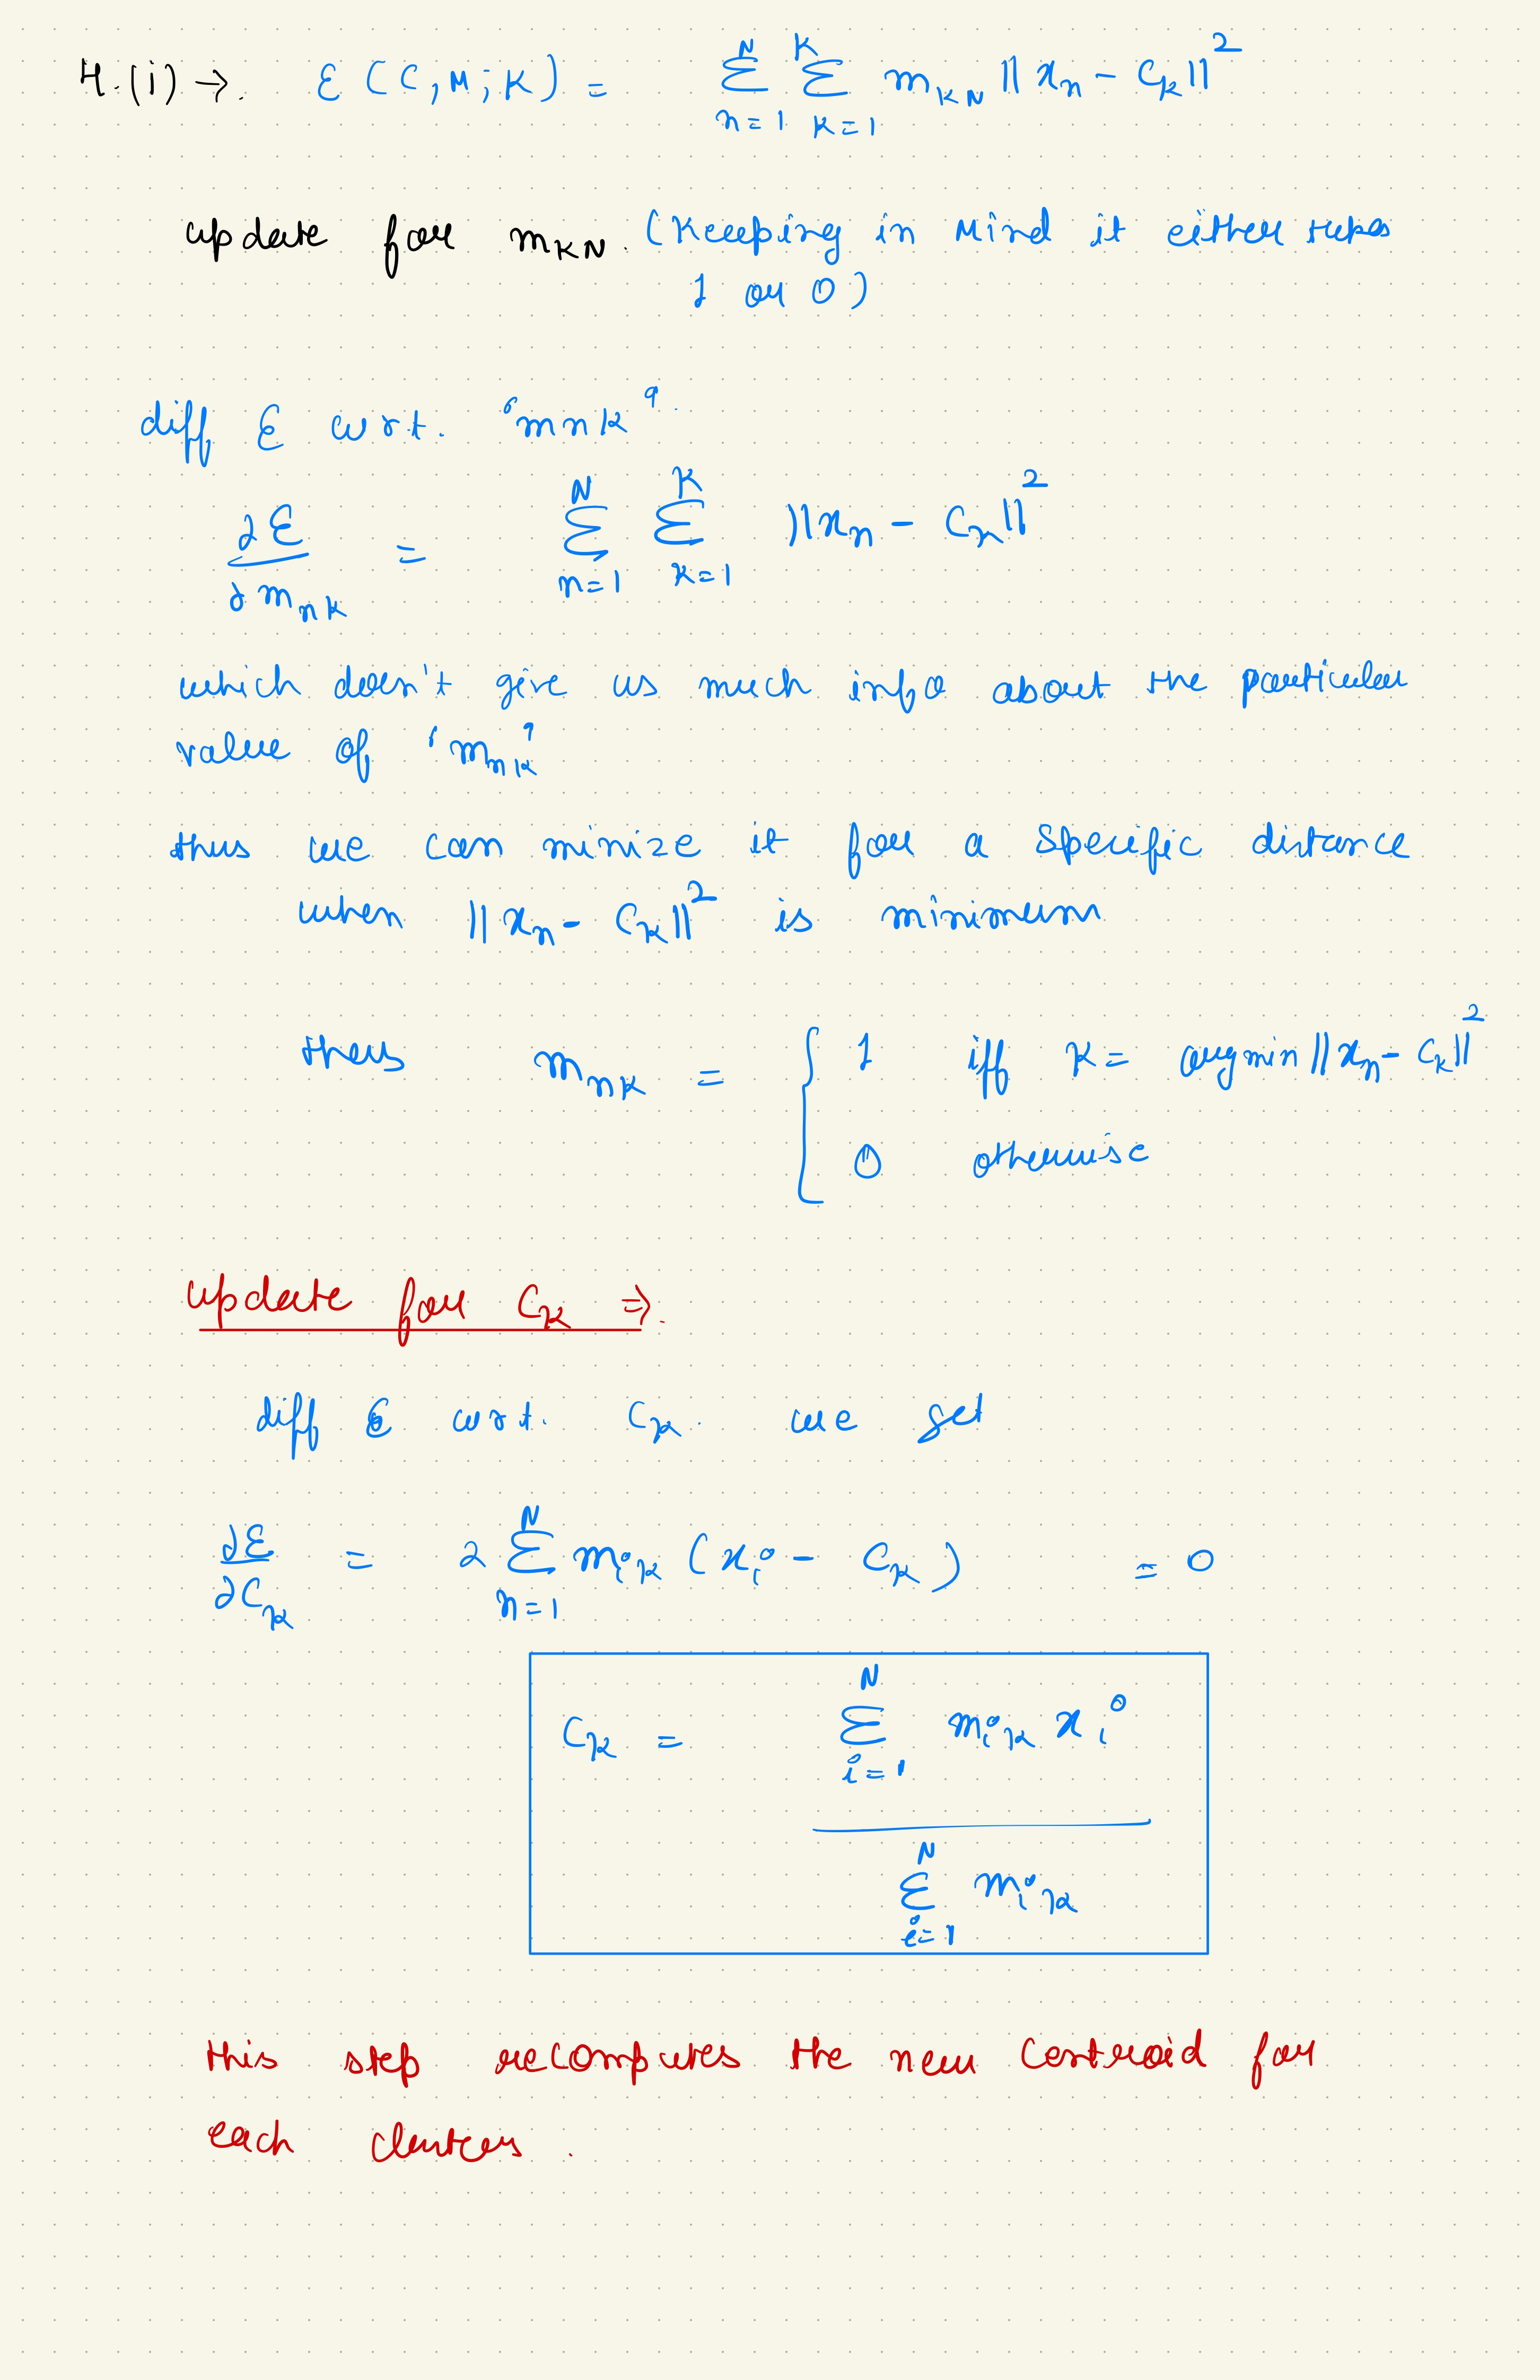

In [3]:
from IPython.display import Image
Image(filename='4a.jpg') 

## 4 K-Means (b)

In [6]:
from sklearn.cluster import KMeans

def kmeans_step(x, k, c=None, init='random'):
    """
    K-Means clustering on a p x N data matrix.
    
    Parameters
    ----------
    x : np.ndarray
        Data matrix of shape (p, N).
    k : int
        Number of cluster.
    c : np.ndarray, optional
        Current cluster centers. If None, the initialization as specified by 'init' will be used.
    init: str
        The initialization method to be used if c is None.
        
    Returns
    -------
    float, np.ndarray
        cost after the step, updated cluster centers
    """
    
    if c is not None: 
        assert c.shape[1] == k  
        

  
    # Note: the documentation is your friend: 
    #       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
    # TODO: set n_cluster, init, n_init and max_iter appropriately
    single_step_kmeans = KMeans(
        n_clusters=k, 
        init=init, 
        max_iter=1,
        n_init=1,
    )
    
    # TODO call the single_step_kmeans
    ssk =single_step_kmeans.fit(x.T)  ## because data has to be in the shape n_samples,n_features..
    
    # TODO get the current energy (you don't have to compute it - it's stored in single_step_kmeans)
    E = ssk.inertia_
    # TODO read out cluster centers 
    C =ssk.cluster_centers_
    
    return E, C
    

In [7]:
# load the data (you can try both with the full normalized feature and the 2d umap projection)

features = np.load('data/dijet_features_normalized.npy')  # full features
# features = np.load('data/dijet_features_umap.npy')      # umap projection

print(f'{features.shape=}')



features.shape=(116, 2233)


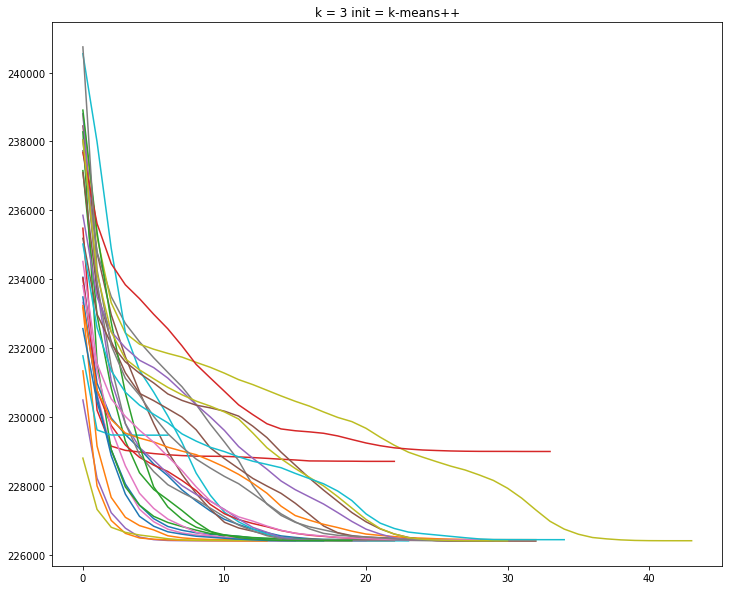

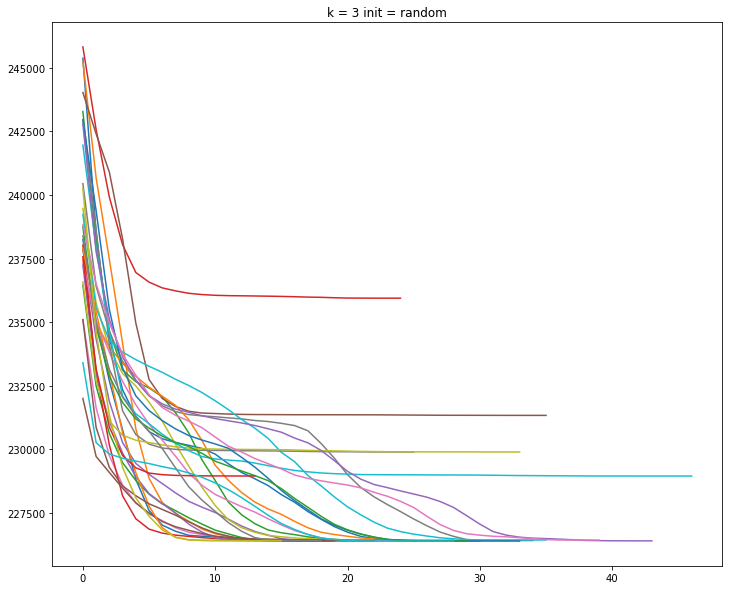

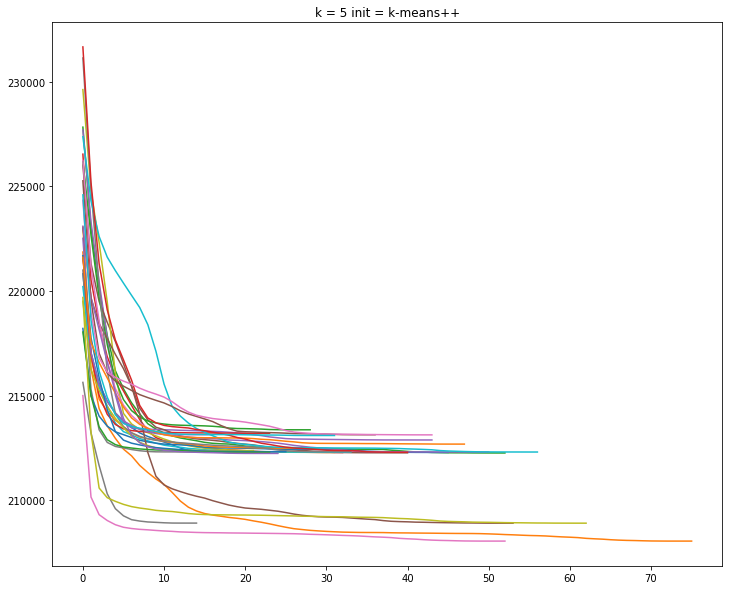

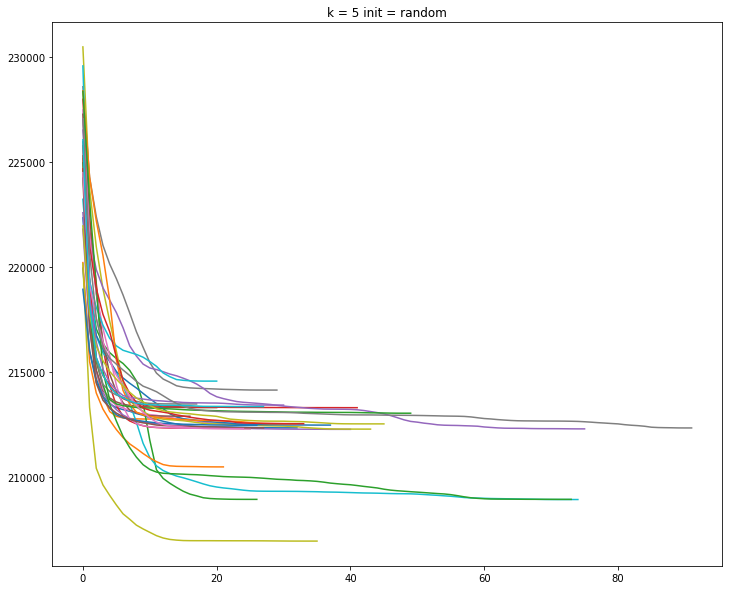

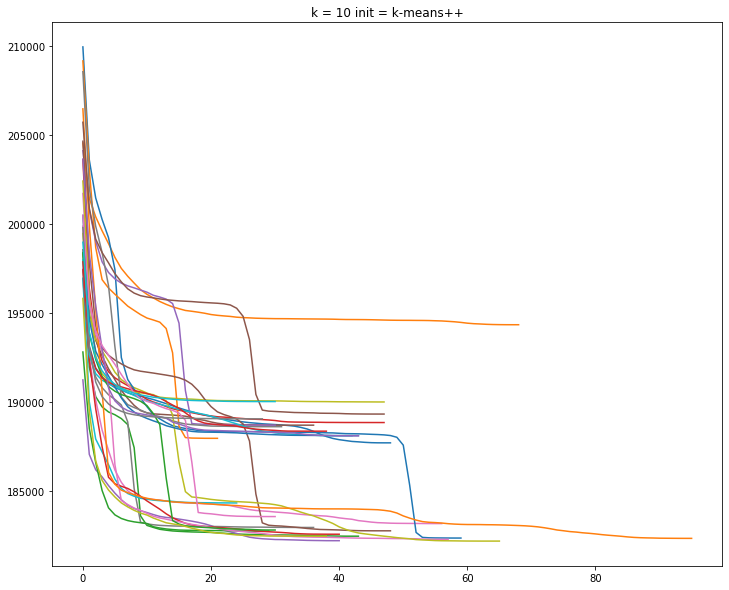

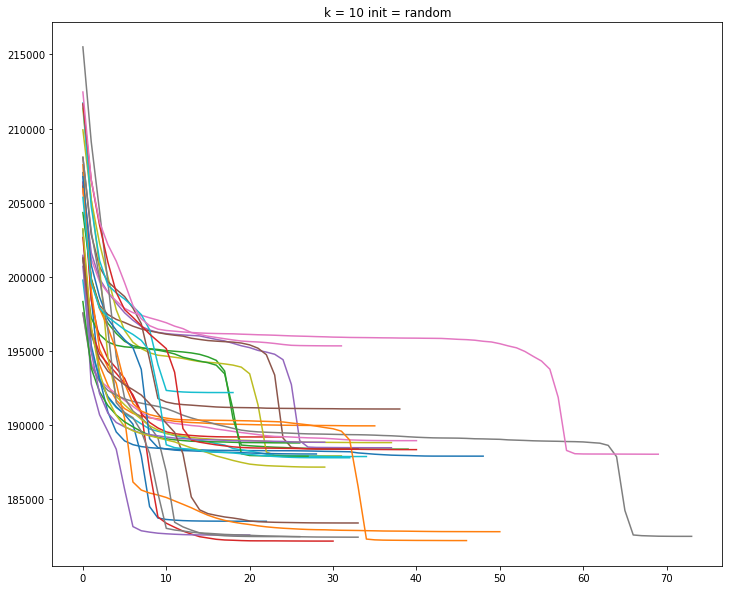

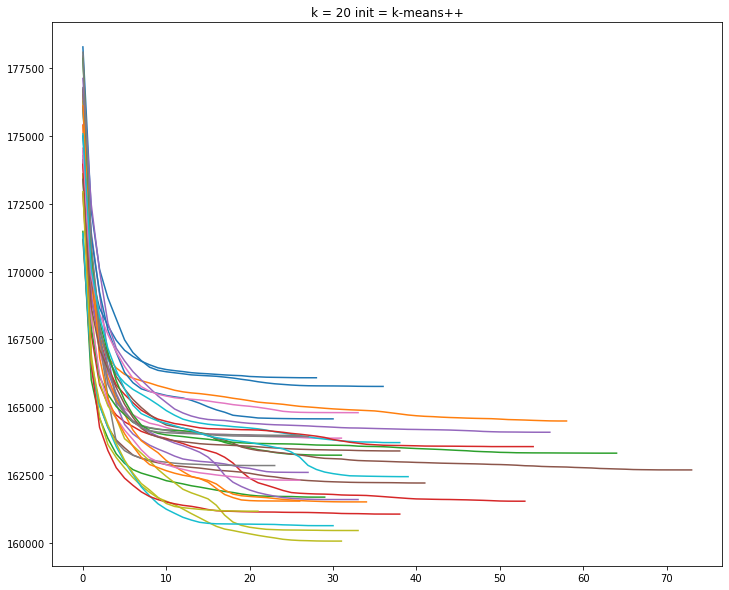

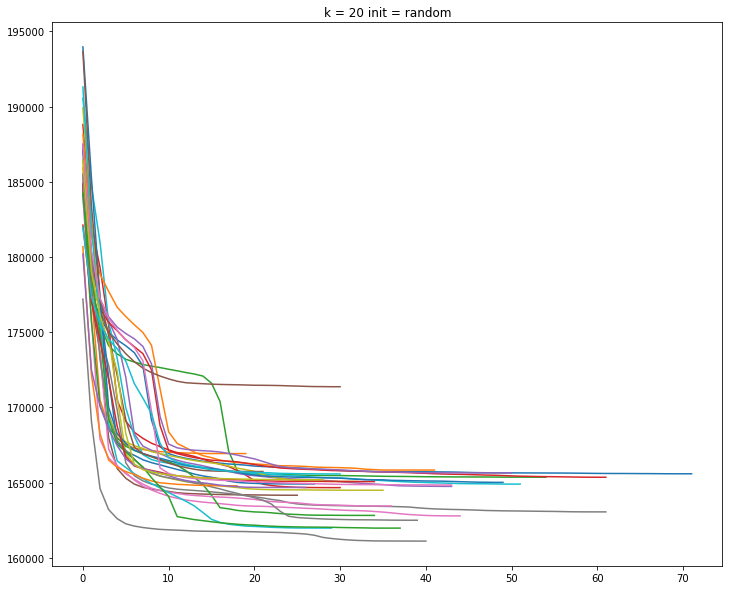

In [9]:
import warnings
warnings.filterwarnings('ignore')

def kmeans(x, k, max_steps=100, init='random'):
    c = None
    energies = []  # list of energies over the iterations. 
    for i in range(max_steps):
        # Call the kmeans_step implemented above to get the energy and the next cluster centers
        E, C = kmeans_step(x, k=k, c=c, init=init)
        energies.append(E)
        init = C  ##changeing the init after each step
       
        
        # Stop the loop if there was no improvement
        if i>=2 and energies[-1] == energies[-2]:
            break
    energies = np.array(energies)
    return energies  # return array of energies

for k in [3,5,10,20]:
    for init in ['k-means++', 'random']:
        # TODO: for the given k and init, run k-means 20 times or more (using the kmeans function above)
        #       and plot the resulting energy trajectories

        plt.figure(figsize = (12,10))  ##initializing figure
        plt.title("k = "+str(k) + " init = "+ init)   ##creating title for a plot
        ##plotting trajectories for 30 times
        for i in range(30):
            energy_arr = kmeans(features,k,max_steps = 100,init = init)  
            plt.plot(np.arange(0,len(energy_arr)),energy_arr)
        plt.show()    


#### Interpretation of the result


we can clearly see that Energy converges to minimum faster when **K-means++** initialization is used than the **random** initialization